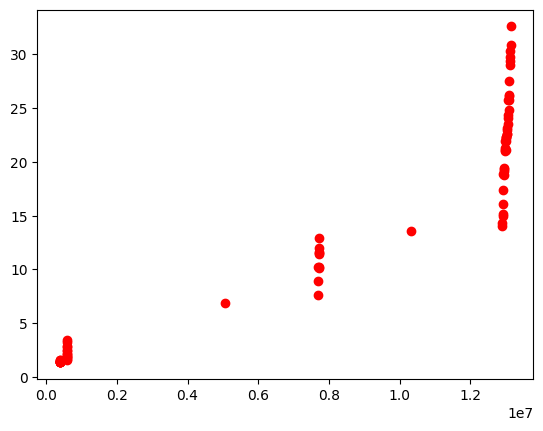

In [27]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data from csv file
e_production_by_source = pd.read_csv('primary_energy_production_by_source.csv')

# show all possible values of the column 'Description'
e_production_by_source['Description'].unique()

# Compute new columns for clean energy and unclean energy
e_production_by_source['unclean_energy'] = e_production_by_source['Description'].apply(lambda x: 'Coal' in x or 'Gas' in x or 'Oil' in x or 'Biomass' in x)
e_production_by_source['clean_energy'  ] = e_production_by_source['Description'].apply(lambda x: 'Nuclear' in x or 'Solar' in x or 'Wind' in x or 'Hydroelectric' in x or 'Geothermal' in x)

# Remove all rows where clean and unclean are false
e_production_by_source = e_production_by_source[(e_production_by_source['clean_energy'] == True) | (e_production_by_source['unclean_energy'] == True)]

# Add a column for the year
e_production_by_source['YYYY'] = e_production_by_source['YYYYMM'].apply(lambda x: str(x)[:4])

# # Find all 'YYYYMM' that have 'Value' == 'Not Available'
# dates_to_remove = e_production_by_source[e_production_by_source['Value'] == 'Not Available']['YYYYMM'].unique()

# # If row 'YYYYMM' is in dates_to_remove, remove it
# e_production_by_source = e_production_by_source[~e_production_by_source['YYYYMM'].isin(dates_to_remove)]

# Remove any rows where Value == 'Not Available'
e_production_by_source = e_production_by_source[e_production_by_source['Value'] != 'Not Available']

# Convert Value column to float
e_production_by_source['Value'] = e_production_by_source['Value'].astype(float)

# Extrace all rows with clean energy and combine the values for each date
clean_energy = e_production_by_source[e_production_by_source['clean_energy'] == True].groupby('YYYY').sum()

# Extract all 'YYYYMM' and 'Value' pairs
clean_energy = clean_energy.reset_index()[['YYYYMM', 'Value']]

# Plot the clean energy production over time
plt.plot(clean_energy['YYYYMM'], clean_energy['Value'], marker='o', linestyle='none', color='r')

# Extrace all rows with unclean energy
unclean_energy = e_production_by_source[e_production_by_source['unclean_energy'] == True]

# Show clean energy data as a scrollable table
